In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [3]:
# Normalize pixel values to range [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
# Class labels
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [5]:
# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # 10 output classes
])

c:\Users\samik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Train model
history = model.fit(x_train, y_train, 
                    epochs=10, 
                    validation_data=(x_test, y_test),
                    batch_size=64)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 90ms/step - accuracy: 0.2909 - loss: 1.8906 - val_accuracy: 0.5338 - val_loss: 1.2916
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 72ms/step - accuracy: 0.5141 - loss: 1.3590 - val_accuracy: 0.6079 - val_loss: 1.1135
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 76ms/step - accuracy: 0.5927 - loss: 1.1569 - val_accuracy: 0.6515 - val_loss: 0.9992
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 84ms/step - accuracy: 0.6343 - loss: 1.0415 - val_accuracy: 0.6806 - val_loss: 0.9186
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 99ms/step - accuracy: 0.6685 - loss: 0.9486 - val_accuracy: 0.6907 - val_loss: 0.8786
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 91ms/step - accuracy: 0.6964 - loss: 0.8724 - val_accuracy: 0.6921 - val_loss: 0.8801
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 101ms/step - accuracy: 0.7183 - loss: 0.8103 - val_accuracy: 0.7094 - val_loss: 0.8352
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 100ms/step - accuracy: 0.7399 - loss: 0.7515 

In [8]:
# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")

313/313 - 7s - 24ms/step - accuracy: 0.7324 - loss: 0.7916

Test Accuracy: 73.24%


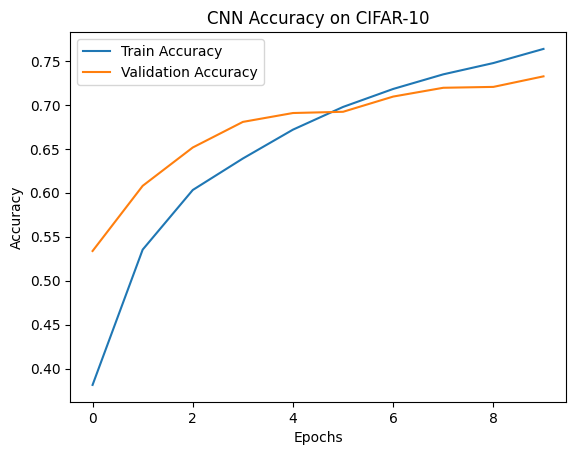

In [9]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("CNN Accuracy on CIFAR-10")
plt.show()

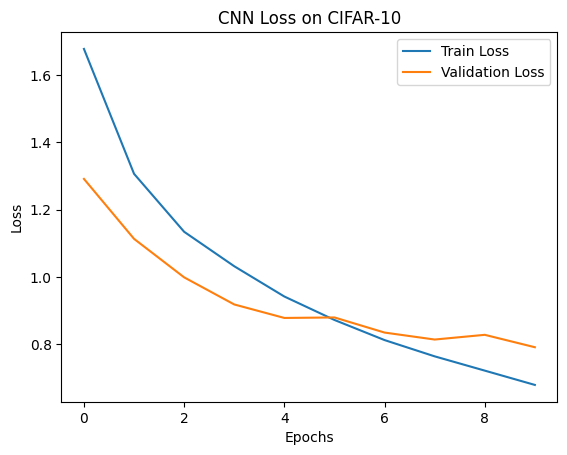

In [10]:
# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("CNN Loss on CIFAR-10")
plt.show()